In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import missingno as msno

In [10]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

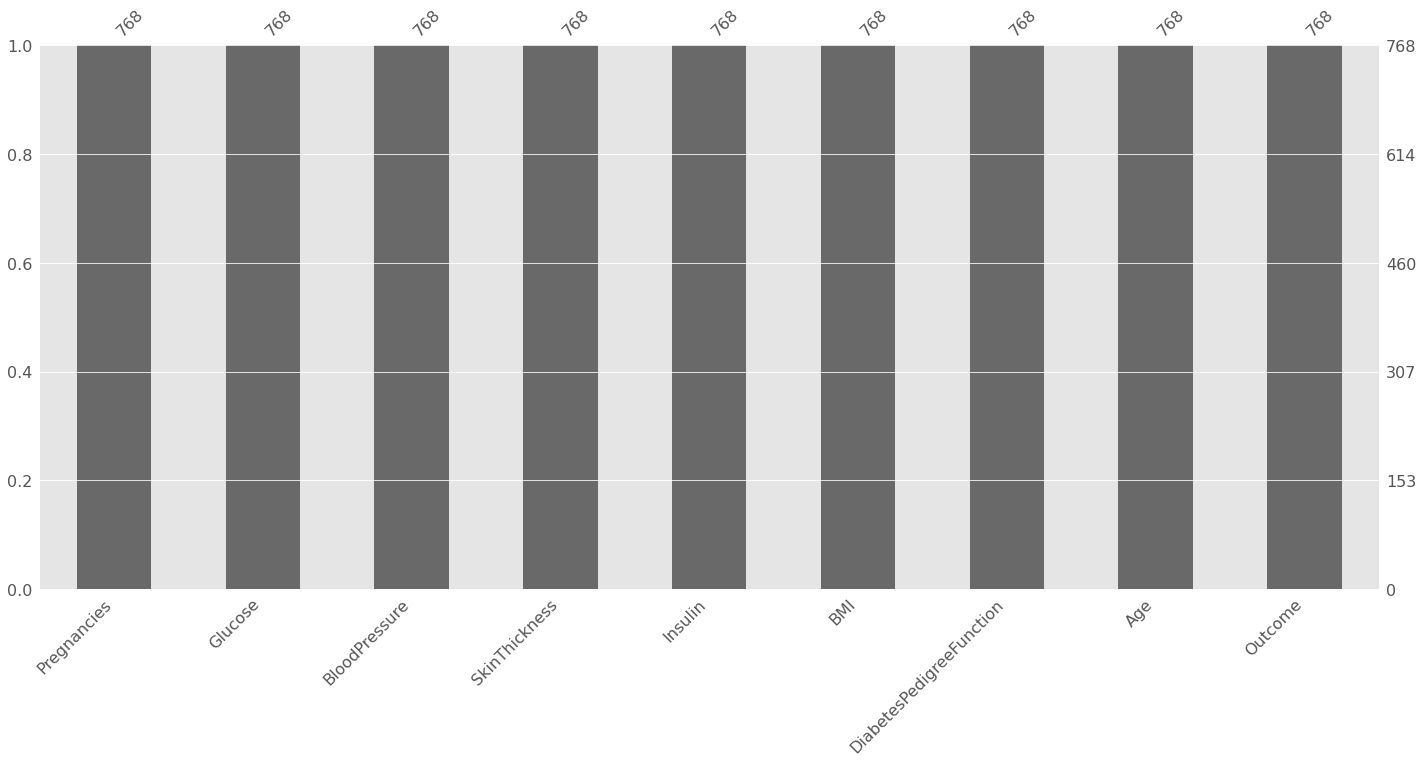

In [15]:
p=msno.bar(df)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [23]:
#Let's create numpy arrays for features and target

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [24]:
#importing train_test_split

from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [26]:
#import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


#Setup arrays to store training and test accuracies

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [28]:
## score that comes from testing on the same datapoints that were used for training

max_train_accuracy = max(train_accuracy)
train_accuracy_ind = [i for i, v in enumerate(train_accuracy) if v == max_train_accuracy]
print('Max train accuracy {} % and k = {}'.format(max_train_accuracy*100,list(map(lambda x: x+1, train_accuracy_ind))))

Max train accuracy 100.0 % and k = [1]


In [29]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

max_test_accuracy = max(test_accuracy)
test_accuracy_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_accuracy]
print('Max test accuracy {} % and k = {}'.format(max_test_accuracy*100,list(map(lambda x: x+1, test_accuracy_ind))))

Max test accuracy 72.72727272727273 % and k = [4]


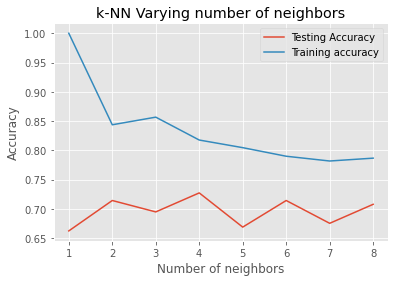

In [30]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [31]:
#Setup a knn classifier with k neighbors

knn = KNeighborsClassifier(n_neighbors=7)

In [32]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.

knn.score(X_test,y_test)

0.6753246753246753

# Confusion Matrix

In [34]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [35]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [38]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[78, 22],
       [28, 26]], dtype=int64)

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

In [39]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,78,22,100
1,28,26,54
All,106,48,154


Text(42.0, 0.5, 'Truth')

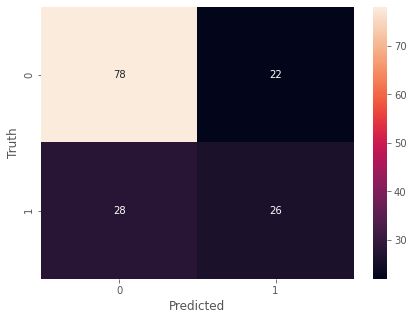

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
#import classification_report
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



# ROC (Reciever Operating Charecteristic) curve

In [43]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [44]:
from sklearn.metrics import roc_curve

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

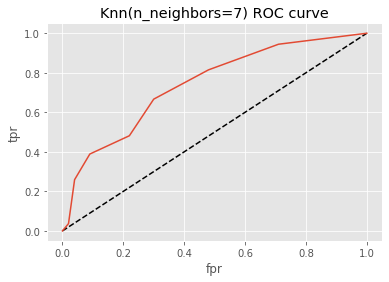

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [47]:
#Area under ROC curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7396296296296296

# Cross Validation

In [48]:
#import GridSearchCV

from sklearn.model_selection import GridSearchCV

In [49]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [50]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
knn_cv.best_score_

0.7578558696205755

In [52]:
knn_cv.best_params_

{'n_neighbors': 14}